# Задача 1
Загрузим данные

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.array(pd.read_csv('data.csv', sep=' ', header=None))
pd.DataFrame(data=X)

,0,1,2,3,4,5,6,7,8,9
0,0.415,0.420,0.120,0.506,1.074,0.532,0.016,0.025,0.434000,0.387
1,0.448,0.263,0.069,1.107,1.052,0.246,0.443,0.234,0.064000,0.387
2,0.097,0.478,0.135,0.066,1.259,0.381,0.011,0.128,0.004673,0.088
3,0.142,1.029,0.204,0.279,0.107,0.187,0.056,0.560,0.512000,0.070
4,0.024,0.215,0.253,2.073,0.119,0.215,0.056,0.512,0.407000,0.550
5,0.085,0.043,0.055,0.595,0.565,0.128,0.171,0.065,0.391000,0.052
6,0.313,0.108,0.041,0.065,0.201,0.255,0.122,0.500,0.735000,0.036
7,0.228,0.380,0.255,0.117,0.319,0.086,0.362,0.328,0.330000,0.075
8,0.604,0.207,0.202,0.127,0.060,0.127,0.262,0.119,0.066000,0.464
9,0.025,0.323,0.137,0.831,0.460,0.606,0.054,0.417,0.101000,0.284


**1) Найти крайние члены вариационного ряда и размах выборки**

In [2]:
print('Min: ', X.min())
print('Max: ', X.max())
print('Размах: ', X.max()-X.min())
print('Длина выборки: ', X.shape[0] * X.shape[1])

Min:  0.004673
Max:  2.073
Размах:  2.068327
Длина выборки:  120


**2) Осуществить группировку данных (количество интервалов по правилу Стерджеса)**

In [3]:
from math import log2, trunc

l = 1 + trunc(log2(X.shape[0] * X.shape[1]))
print('Количество интервалов: ', l)

Количество интервалов:  7


In [4]:
h = (X.max() - X.min()) / l
print('h: ', h)

h:  0.2954752857142857


In [5]:
np.linspace(X.min(), X.max(), l + 1)

array([0.004673  , 0.30014829, 0.59562357, 0.89109886, 1.18657414,
       1.48204943, 1.77752471, 2.073     ])

In [6]:
i = X.min()
bins = []
while i != X.max():
    bins.append(i)
    i += h
bins[-1] += 0.001
np.histogram(X.reshape(X.shape[0]*X.shape[1],), bins=np.linspace(X.min(), X.max(), l + 1))

(array([69, 33,  6,  9,  2,  0,  1], dtype=int32),
 array([0.004673  , 0.30014829, 0.59562357, 0.89109886, 1.18657414,
        1.48204943, 1.77752471, 2.073     ]))

In [7]:
def count(data, beg, h):
  c = 0
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      if data[i][j] < beg + h and data[i][j] >= beg:
        c += 1
  return c

f = np.zeros((0, 2))
step = X.min() 
while step < X.max():
  val = count(X, step, h)
  # нужно включить max в последний интервал
  if step + h >= X.max():
    val += 1
  
  f = np.vstack((f, [step, val]))
  step += h
pd.DataFrame(data=f)

,0,1
0,0.004673,69.0
1,0.300148,33.0
2,0.595624,6.0
3,0.891099,9.0
4,1.186574,2.0
5,1.482049,0.0
6,1.777525,1.0


In [8]:
p = np.array(pd.DataFrame(data=f)[1]) / (X.shape[0] * X.shape[1])
pd.DataFrame(data=p, columns=['p'])

,p
0,0.575000
1,0.275000
2,0.050000
3,0.075000
4,0.016667
5,0.000000
6,0.008333


In [9]:
f1 = p / h
pd.DataFrame(data=f1, columns=['f1'])

,f1
0,1.946017
1,0.930704
2,0.169219
3,0.253828
4,0.056406
5,0.000000
6,0.028203


In [10]:
int_ = np.array(pd.DataFrame(data=f)[0])
pd.DataFrame(data=int_, columns=['int'])

,int
0,0.004673
1,0.300148
2,0.595624
3,0.891099
4,1.186574
5,1.482049
6,1.777525


In [11]:
int1 = int_
pd.DataFrame(data=int1, columns=['int1'])

,int1
0,0.004673
1,0.300148
2,0.595624
3,0.891099
4,1.186574
5,1.482049
6,1.777525


**3) По сгруппированным данным постройте гистограмму относительных частот**

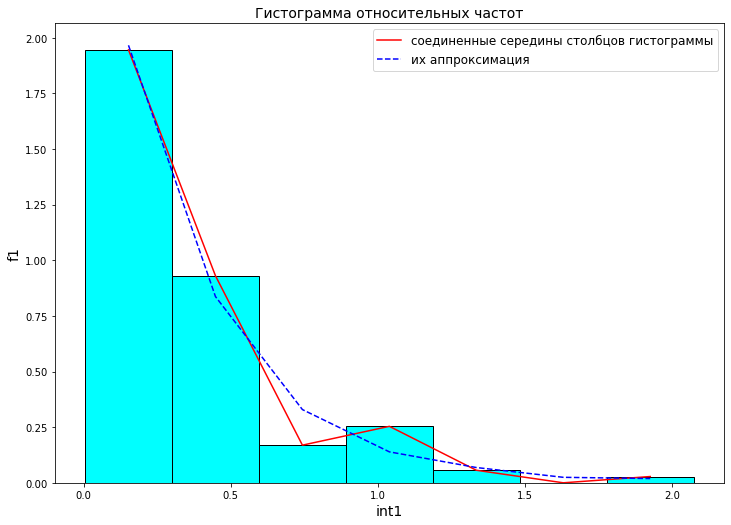

In [12]:
import matplotlib.pyplot as plt

def draw_hystogram(int1, f1):
  x = int1
  y = f1

  fig, ax = plt.subplots()

  # строю гистограмму
  ax.bar(x, y, width=h, color='cyan', edgecolor='black', align='edge')

  # соединяю середины столбцов гистограммы
  ax.plot(x + h/2, y, c='red', label='соединенные середины столбцов гистограммы')

  # строю аппроксимацию середин столбцов гистограммы
  z = np.polyfit(x, y, 4)
  p = np.poly1d(z)
  ax.plot(x + h/2, p(x), c='blue', linestyle='--', label='их аппроксимация')

  ax.set_ylabel('f1', fontsize=14)
  ax.set_xlabel('int1', fontsize=14)
  ax.set_title('Гистограмма относительных частот', fontsize=14)

  fig.set_figwidth(12)
  fig.set_figheight(12/ 1.42)

  plt.legend(fontsize=12)
  plt.show()

draw_hystogram(int1, f1)

**4) Вычислите выборочное среднее и выборочную дисперсию**

In [13]:
print('Выборочное среднее: ', X.mean())
print('Выборочная дисперсия: ', X.var(ddof=1))

Выборочное среднее:  0.3404389416666667
Выборочная дисперсия:  0.11536431156768566


**5) По виду гистограммы определите возможный закон распределения, оцените параметры этого закона по методу моментов, постройте совмещенные графики гистограммы и плотности предполагаемого закона**

Рассмотрим показательное распределение

In [14]:
from sympy import symbols, exp, integrate, simplify, solve, oo

x_sym, m_sym, lamb_sym = symbols('x m lambda', positive=True)

dens = lamb_sym * exp(-lamb_sym * x_sym)
m_xi = integrate(x_sym * dens, (x_sym, 0, oo))
print('Первый момент: ', m_xi)
print('Параметр лямбда: ', solve(m_xi - m_sym, lamb_sym)[0])

Первый момент:  1/lambda
Параметр лямбда:  1/m


Оценка параметра:

$xm$ - выборочное среднее, $M\xi$ - первый момент
$$M\xi=\int_{-\infty}^\infty xp_{\xi}(x)dx = \int_{0}^\infty x\lambda e^{-\lambda x}dx = \frac{1}{\lambda}$$
$$M\xi = xm = 0.34 \to \lambda = \frac{1}{xm} = 2.941$$

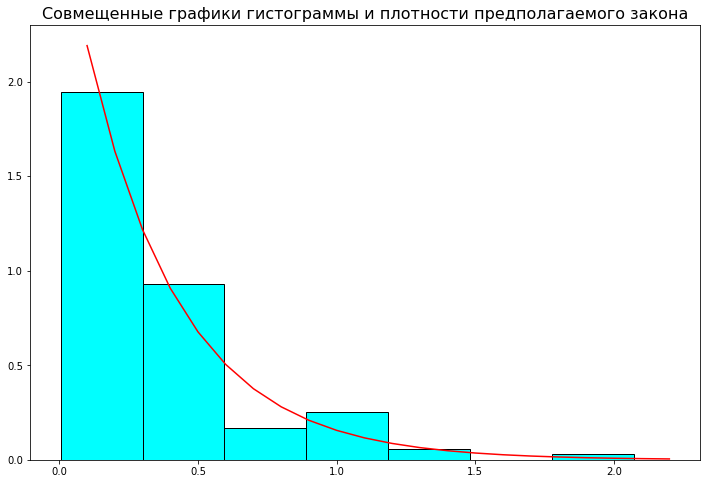

In [15]:
def exp_distribution(x, lamb):
    return lamb * np.exp(-lamb * x)

def draw_shedule(func, int_, lamb, int1, f1):
  x = [i / 10 for i in range(1, 23)]
  y = [func(arg, lamb) for arg in x]

  plt.figure(figsize=(12,8))
  plt.title('Совмещенные графики гистограммы и плотности предполагаемого закона', fontsize=16)
  plt.plot(x, y, c = "r")
  x = int1
  y = f1
  plt.bar(x, y, width=h, color='cyan', edgecolor='black', align='edge')

  plt.show()

lamb = 1 / X.mean()
draw_shedule(exp_distribution, int_, lamb, int1, f1)

По виду гистограммы заключаем, что распределение эмпирических частот похоже на показательный закон

**6) Найдите эмпирическую функцию распределения и постройте совмещенные графики эмпирической и теоретической функций распределения**

In [16]:
kum = np.zeros((0, 1))
kum = np.vstack((kum, [0,]))

for i in range(1, len(p) + 1):
  kum = np.vstack((kum, [kum[i - 1] + p[i - 1],]))
pd.DataFrame(data=kum, columns=['kum'])

,kum
0,0.000000
1,0.575000
2,0.850000
3,0.900000
4,0.975000
5,0.991667
6,0.991667
7,1.000000


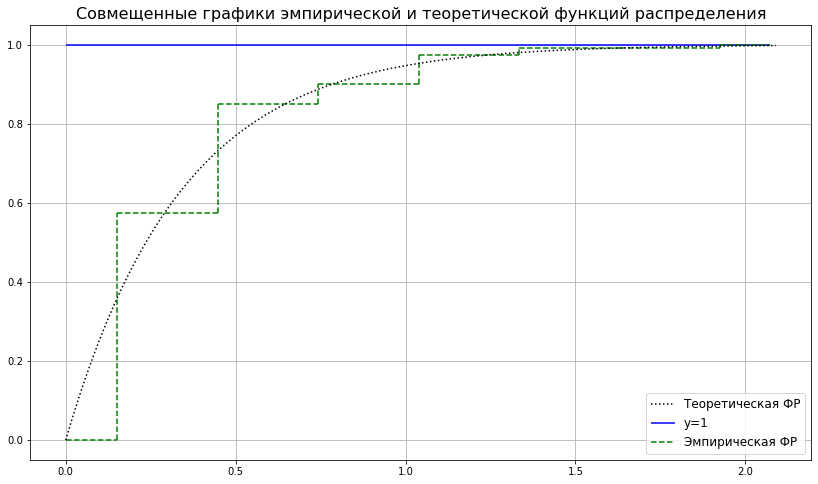

In [17]:
def exp_func(x, lamb):
    return 1 - np.exp(-lamb * x)

def draw_empyr_func(kum, int_, lamb):
  int_1 = np.zeros((0, 1))
  for i in range(0, len(int_)):
    int_1 = np.vstack((int_1, [int_[i] + h/2,]))
  int_1 = np.vstack((int_1, [X.max(),]))

  plt.figure(figsize=(14,8))
  plt.title('Совмещенные графики эмпирической и теоретической функций распределения', fontsize=16)
  plt.grid()
  
  # рисую y = 1
  plt.hlines(1, 0, X.max(), colors='blue', linestyle = 'solid', label='y=1')

  # строю и рисую эмпирическую функцию распределения
  for i in range(len(int_1) - 1):
    if i == 0:
      x = [0, int_1[i]]
      y = 0
      plt.hlines(y, x[0], x[1], colors='green', linestyle = '--', label='Эмпирическая ФР')

    x = [int_1[i], int_1[i + 1]]
    y = kum[i + 1]
    plt.hlines(y, x[0], x[1], colors='green', linestyle = '--')
    plt.vlines(x[0], kum[i], kum[i + 1], colors='green', linestyle = '--')
  
  # рисую теоретическую функцию распределения
  x = [i / 100 for i in range(0, int(round(X.max(), 1) * 100))]
  y = [exp_func(i / 100, lamb) for i in range(0, int(round(X.max(), 1) * 100))]
  plt.plot(x, y, c = "black", linestyle='dotted', label='Теоретическая ФР')

  plt.legend(loc='lower right', fontsize=12)
  plt.show()
draw_empyr_func(kum, int_, lamb)

**Вывод**: Первоначальная обработка позволяет предварительно отнести выборку к показательному закону с параметром $\lambda=2.941$.